# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
type(cities)

list

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + 'jamestown').json()
response



{'coord': {'lon': -79.2353, 'lat': 42.097},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 6.42,
  'feels_like': 5.52,
  'temp_min': 1.16,
  'temp_max': 9.8,
  'pressure': 1020,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 190},
 'clouds': {'all': 100},
 'dt': 1645501181,
 'sys': {'type': 2,
  'id': 2008828,
  'country': 'US',
  'sunrise': 1645445079,
  'sunset': 1645484207},
 'timezone': -18000,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#query_url = url + "api-key=" + api_key + "&q=" + query
# For each city name in cities list, do below things...


city_name_list=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
temp_list=[]
wind_speed_list=[]
index_counter = 0
set_counter=0

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        temp_list.append(response['main']['temp'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("Data Retrieval Complete")

Processing Record 1 of Set 0 : luorong
Processing Record 2 of Set 0 : yellowknife
Processing Record 3 of Set 0 : pasighat
Processing Record 4 of Set 0 : ushuaia
Processing Record 5 of Set 0 : port macquarie
Processing Record 6 of Set 0 : cape town
City not found. Skipping...
Processing Record 7 of Set 0 : acarau
Processing Record 8 of Set 0 : cabo san lucas
Processing Record 9 of Set 0 : mataura
Processing Record 10 of Set 0 : mar del plata
Processing Record 11 of Set 0 : bageshwar
Processing Record 12 of Set 0 : nikolskoye
City not found. Skipping...
Processing Record 13 of Set 0 : nalgonda
Processing Record 14 of Set 0 : rikitea
Processing Record 15 of Set 0 : atuona
Processing Record 16 of Set 0 : ancud
Processing Record 17 of Set 0 : guayaramerin
Processing Record 18 of Set 0 : port alfred
Processing Record 19 of Set 0 : butaritari
City not found. Skipping...
Processing Record 20 of Set 0 : hobart
City not found. Skipping...
Processing Record 21 of Set 0 : lebu
Processing Record 22

Processing Record 32 of Set 3 : hargeysa
Processing Record 33 of Set 3 : buin
Processing Record 34 of Set 3 : villa union
City not found. Skipping...
Processing Record 35 of Set 3 : alofi
City not found. Skipping...
Processing Record 36 of Set 3 : mahdalynivka
Processing Record 37 of Set 3 : zeya
Processing Record 38 of Set 3 : mandla
Processing Record 39 of Set 3 : puerto ayora
Processing Record 40 of Set 3 : karachi
Processing Record 41 of Set 3 : severnoye
Processing Record 42 of Set 3 : grindavik
Processing Record 43 of Set 3 : port-gentil
Processing Record 44 of Set 3 : berlevag
Processing Record 45 of Set 3 : buraydah
Processing Record 46 of Set 3 : sinnamary
Processing Record 47 of Set 3 : marsh harbour
Processing Record 48 of Set 3 : bilma
City not found. Skipping...
Processing Record 49 of Set 3 : takoradi
Processing Record 50 of Set 3 : berbera
Processing Record 0 of Set 4 : dordrecht
City not found. Skipping...
Processing Record 1 of Set 4 : otradnoye
Processing Record 2 of 

Processing Record 16 of Set 7 : samfya
Processing Record 17 of Set 7 : coihaique
Processing Record 18 of Set 7 : paamiut
Processing Record 19 of Set 7 : bashmakovo
Processing Record 20 of Set 7 : soyo
City not found. Skipping...
Processing Record 21 of Set 7 : saldanha
City not found. Skipping...
Processing Record 22 of Set 7 : progreso
Processing Record 23 of Set 7 : santa maria
Processing Record 24 of Set 7 : sembe
Processing Record 25 of Set 7 : libourne
Processing Record 26 of Set 7 : schruns
Processing Record 27 of Set 7 : mahenge
Processing Record 28 of Set 7 : yamethin
Processing Record 29 of Set 7 : laurel
Processing Record 30 of Set 7 : tahe
Processing Record 31 of Set 7 : svetlaya
Processing Record 32 of Set 7 : shakawe
Processing Record 33 of Set 7 : saint-leu
Processing Record 34 of Set 7 : ust-ilimsk
Processing Record 35 of Set 7 : kahului
Processing Record 36 of Set 7 : lagoa
Processing Record 37 of Set 7 : ostrovnoy
Processing Record 38 of Set 7 : kuusamo
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "city": city_name_list,
    "lat":lat_list,
    "long":lng_list,
    "Country":country_list,
    "date":date_list,
    "temperature": temp_list,
    "humidity": humidity_list,
    "cloudiness":cloudiness_list,
    "wind speed": wind_speed_list,
}

In [6]:
weather_df=pd.DataFrame(weather_dict)

weather_df.to_csv('city_weather1.csv')
weather_df

city      lat      long Country        date  temperature  \
0             Luorong  24.4058  109.6086      CN  1645501199        41.47   
1         Yellowknife  62.4560 -114.3525      CA  1645501200       -17.64   
2            Pāsighāt  28.0667   95.3333      IN  1645501200        66.36   
3             Ushuaia -54.8000  -68.3000      AR  1645501201        51.46   
4      Port Macquarie -31.4333  152.9167      AU  1645501201        75.09   
..                ...      ...       ...     ...         ...          ...   
540     San Policarpo  12.1791  125.5072      PH  1645501406        79.27   
541           Okhotsk  59.3833  143.3000      RU  1645501406        -1.19   
542              Rome  43.2128  -75.4557      US  1645501407        38.35   
543        Port Blair  11.6667   92.7500      IN  1645501407        82.44   
544  Coahuayana Viejo  18.7333 -103.6833      MX  1645501408        71.55   

     humidity  cloudiness  wind speed  
0          79         100       10.36  
1          83          20        6.91  
2          44          53        2.86  
3         100          75       24.16  
4          78          75        4.61  
..        ...         ...         ...  
540        84         100       19.13  
541        73           0       16.44  
542        63           0        8.05  
543        74          20        8.05  
544        75           1        2.08  

[545 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

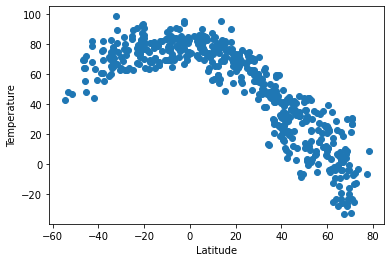

In [61]:
x_values = weather_df['latitude']
y_values = weather_df['temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

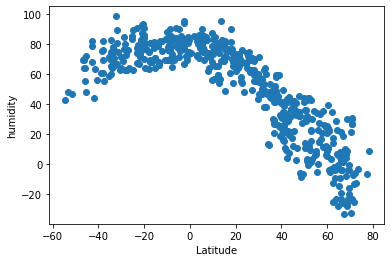

In [62]:
x_values = weather_df['latitude']
y_values = weather_df['temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.savefig("lat_vs_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

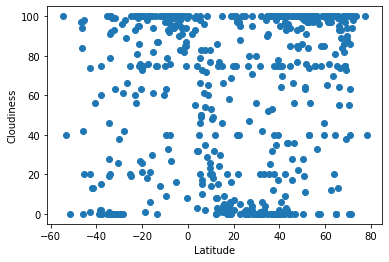

In [63]:
x_values = weather_df['latitude']
y_values = weather_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

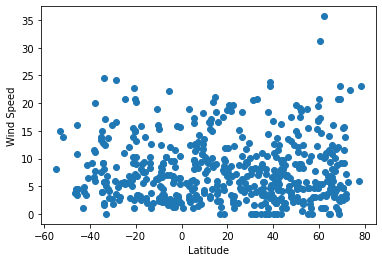

In [64]:
x_values = weather_df['latitude']
y_values = weather_df['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("lat_vs_wind.png")
plt.show()

## Linear Regression

In [38]:
def linear_regession(x,y):
    (slope,intercepts,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq="y =" + str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [41]:
northern_hemi=weather_df.loc[weather_df["latitude"]>=0]
southern_hemi=weather_df.loc[weather_df["latitude"]<0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

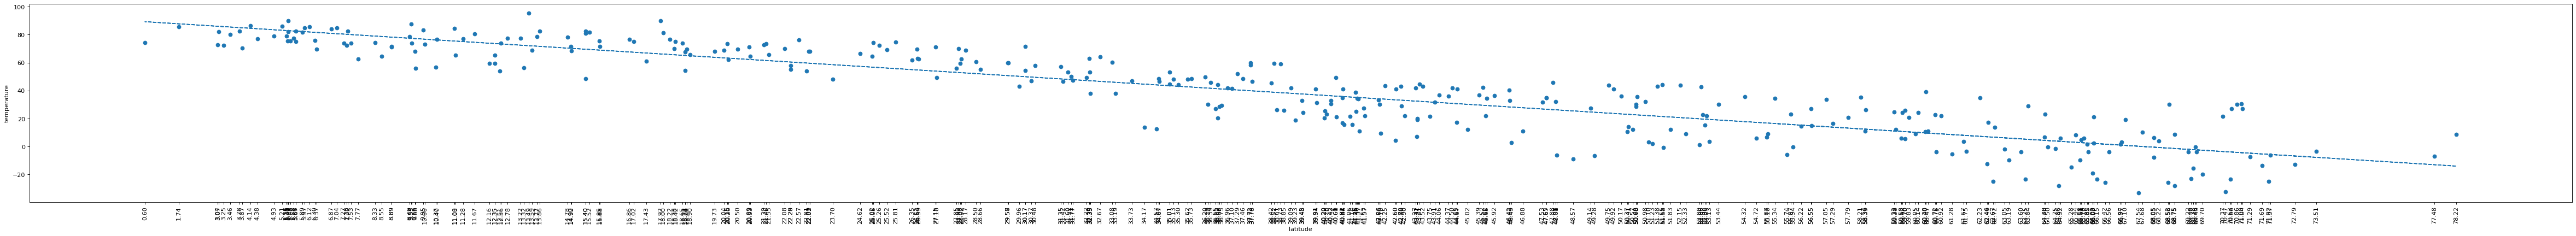

In [65]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["temperature"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["temperature"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.savefig("N_temp_vs_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

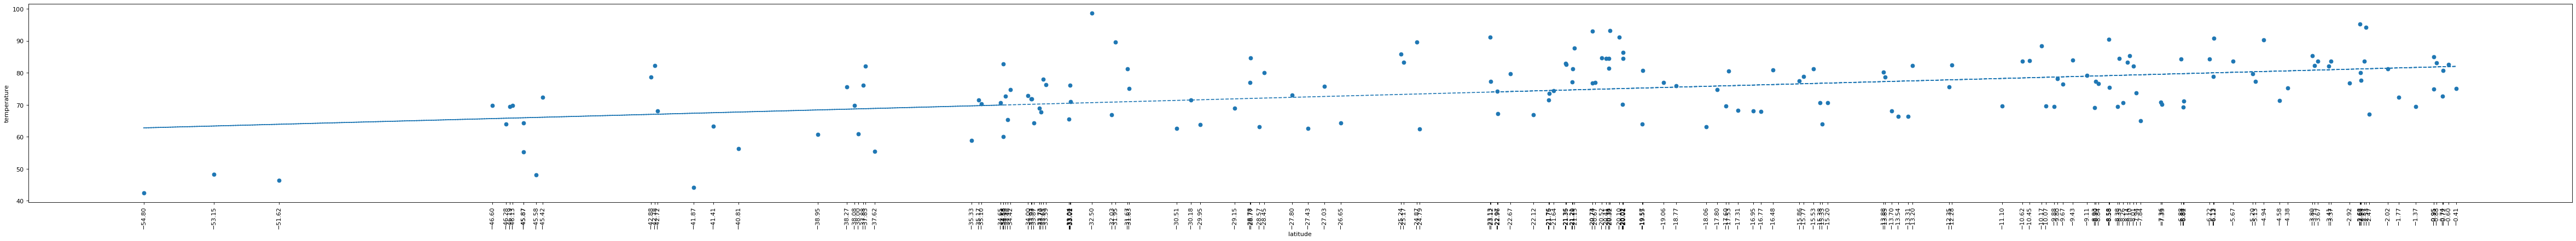

In [66]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["temperature"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["temperature"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.savefig("S_temp_vs_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

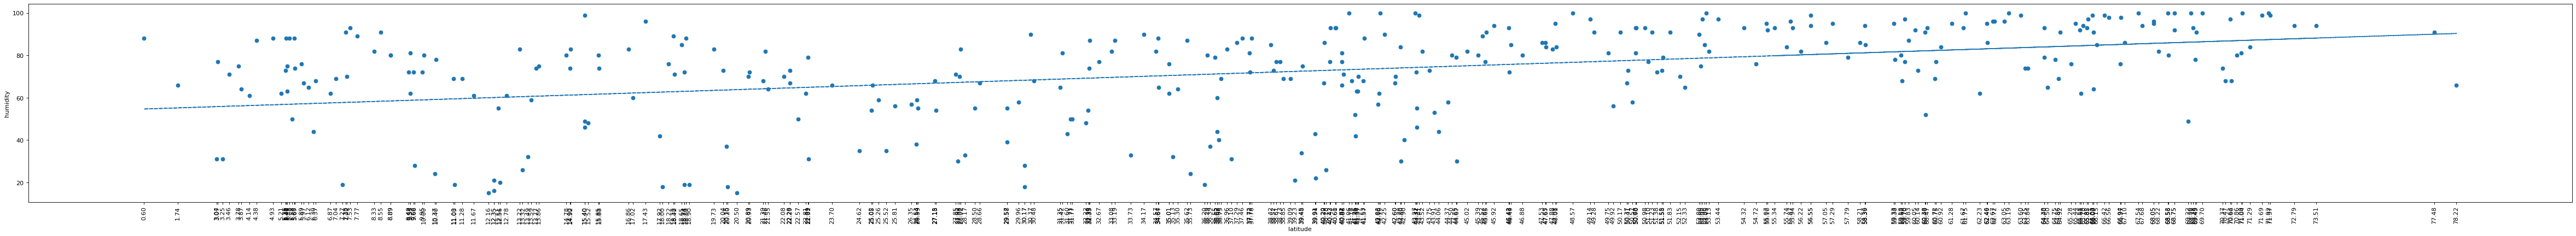

In [67]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["humidity"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["humidity"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.savefig("N_hum_vs_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

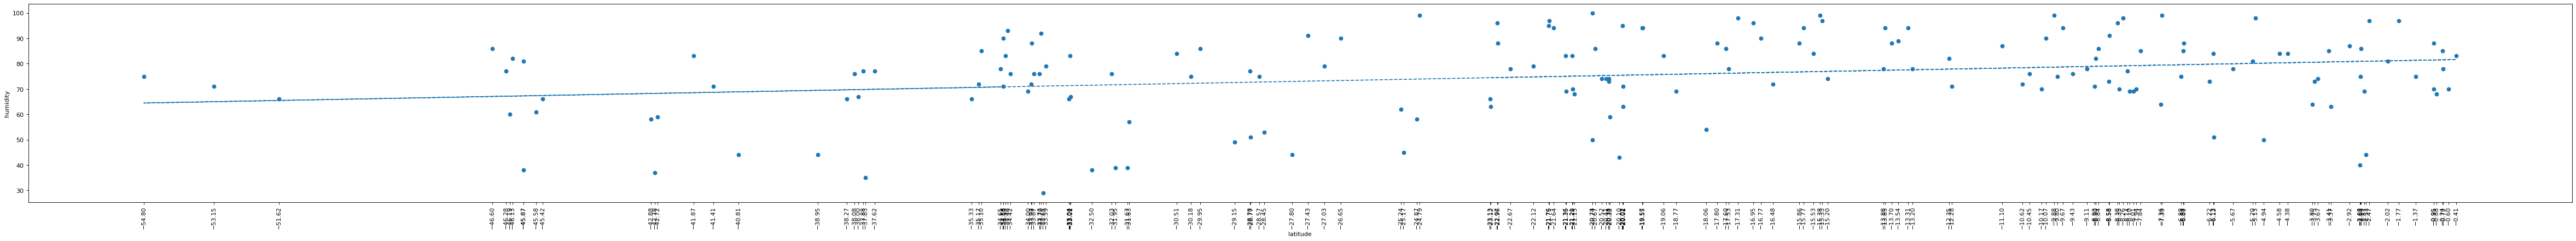

In [68]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["humidity"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["humidity"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.savefig("s_hum_vs_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

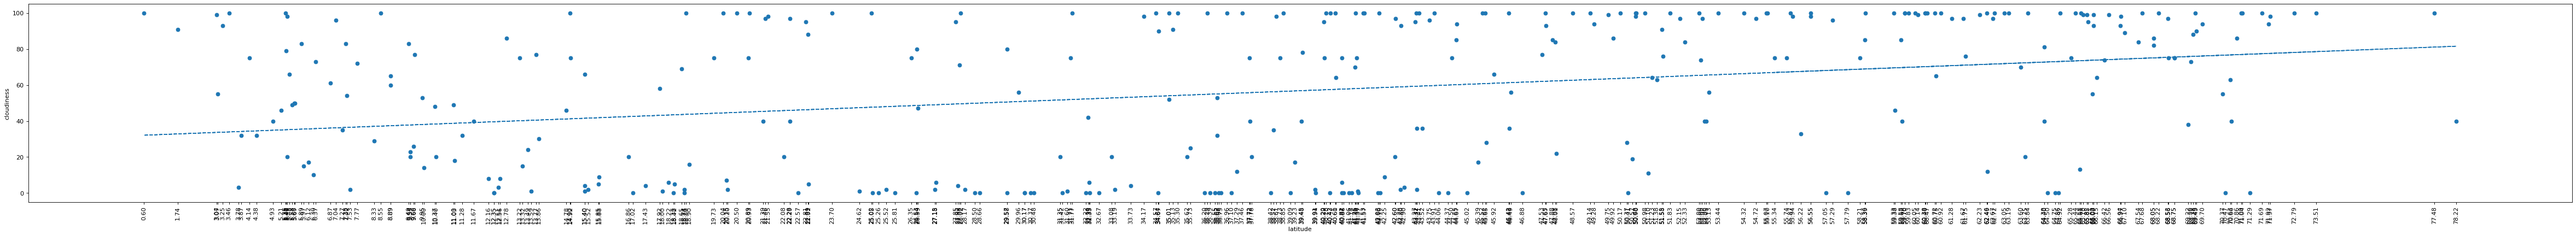

In [69]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["cloudiness"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["cloudiness"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.savefig("N_cloud_vs_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

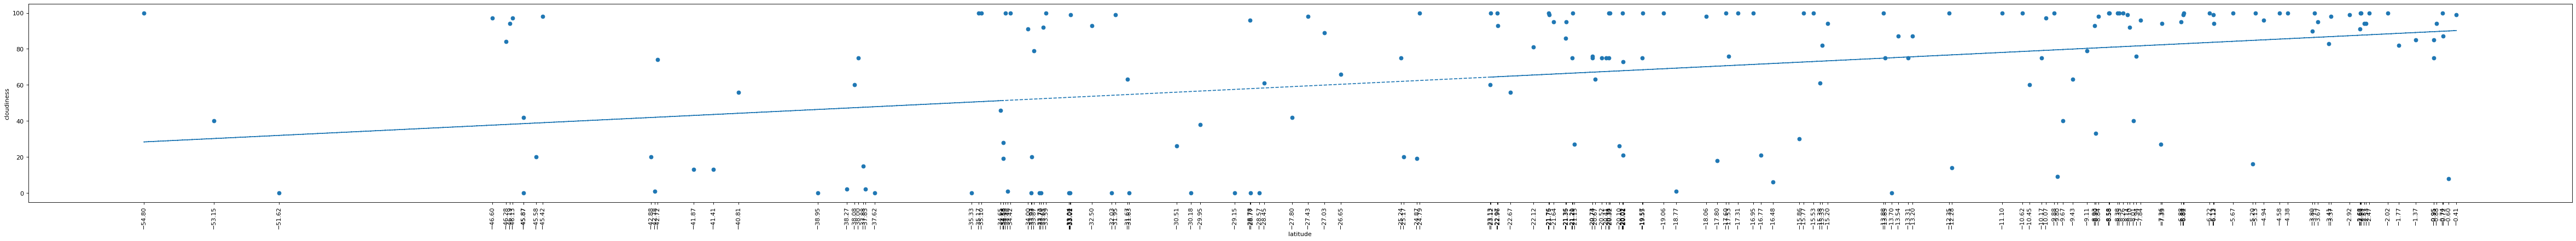

In [70]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["cloudiness"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["cloudiness"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.savefig("s_cloud_vs_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

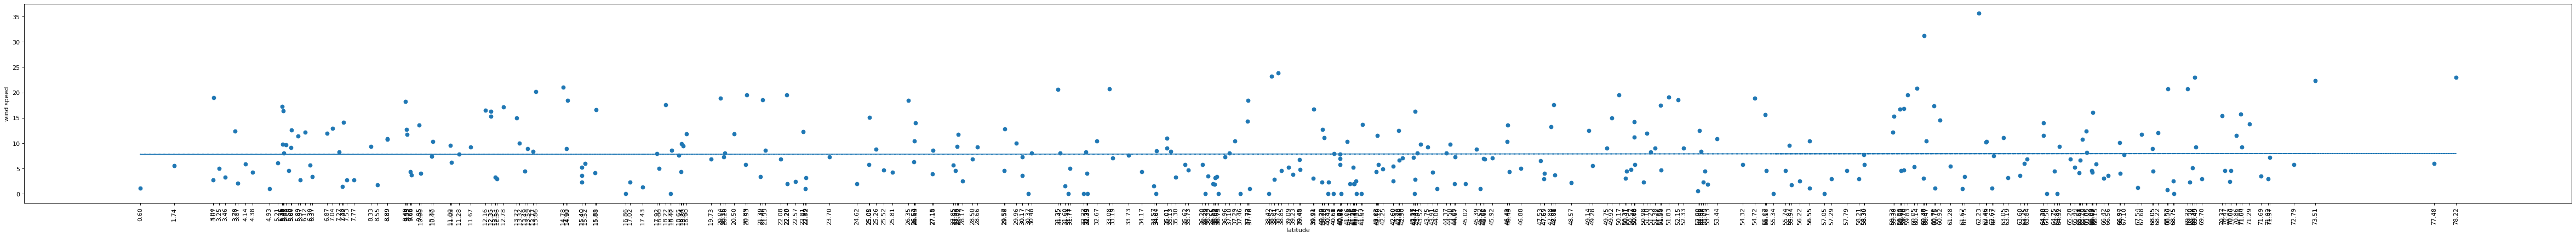

In [56]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(northern_hemi["latitude"], northern_hemi["wind speed"])
fit =slope * northern_hemi["latitude"] + inter
plt.scatter(northern_hemi["latitude"],northern_hemi["wind speed"])
plt.plot(northern_hemi["latitude"],fit,"--")
plt.xticks(northern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

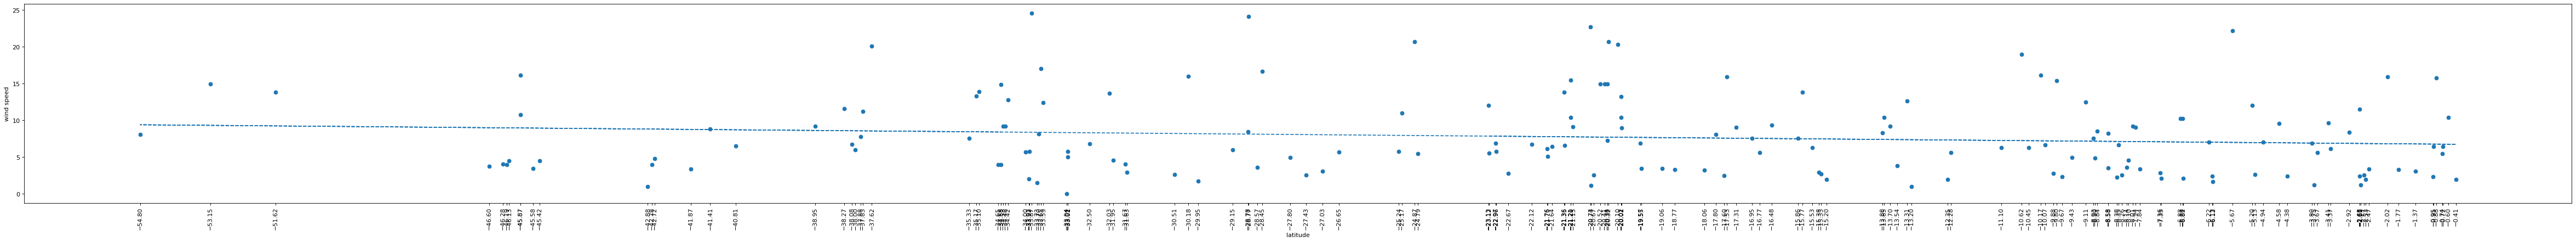

In [71]:
plt.figure(figsize = (75, 6), dpi = 80)
slope, inter, r, p,std_err= stats.linregress(southern_hemi["latitude"], southern_hemi["wind speed"])
fit =slope * southern_hemi["latitude"] + inter
plt.scatter(southern_hemi["latitude"],southern_hemi["wind speed"])
plt.plot(southern_hemi["latitude"],fit,"--")
plt.xticks(southern_hemi["latitude"],rotation=90)
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.savefig("S_wind_vs_lat.png")
plt.show()